# Analysis and Visualisation: NBA Trends

In this project, we’ll analyse and visualise data from  NBA (National Basketball Association) and explore possible associations.

Columns description: 

- `game_id`: an identification number of a game;
- `year_id`: a year the game played;
- `fran_id`: a host's franchise identification name; 
- `opp_fran`: an opponent's franchise identification name;
- `game_location`: a code to mark game locations (`H` - home, `A` - away);
- `is_playoffs`: a code to mark whether the game is a playoff - a final game or a series of games played to break a tie (`1` - playoff, `0` - not a playoff);the
- `pts`: host's points;
- `opp_pts`: opponent's points;
- `game_result`: a code to mark result of a game for a host (`W` - won, `L` - lost);
- `forecast`: chances for winning (closer to 0 - losing, closer to 1 - winning);
- `point_diff`: a difference in points between a host and an opponent.

### Analysing relationships between Quantitative and Categorical

First, let's import necessary libraries and upload `nba_games.csv` to `nba` variable. 


In [181]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


nba = pd.read_csv('nba_games.csv')

Let's start with smaller slice of the dataset: games of the year 2010.

In [182]:
# Subset Data of 2010 
nba_2010 = nba[nba.year_id == 2010]
nba_2010.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
21722,200910280SAS,2010,Spurs,Pelicans,H,0,113,96,W,0.747176,17
21723,200910290CHI,2010,Spurs,Bulls,A,0,85,92,L,0.440765,-7
21724,200910300BOS,2010,Celtics,Bulls,H,0,118,90,W,0.768774,28
21725,200910300CHA,2010,Knicks,Hornets,A,0,100,102,L,0.299804,-2
21726,200910300DET,2010,Thunder,Pistons,A,0,91,83,W,0.255529,8


Suppose we want to compare the "Knicks" to the "Nets" with respect to points earned per game. 

In [183]:
# Knicks points in 2010
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
knicks_pts

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64

In [184]:
# Nets points in 2010
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']
nets_pts

21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64

Let's check difference between their means.

In [185]:
# Difference between Knicks and Nets averages
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
diff_means_2010

9.731707317073173

Result: "Knicks" have higher average number of points in 2010 than "Nets". Let's visualise it via overlapping histograms.

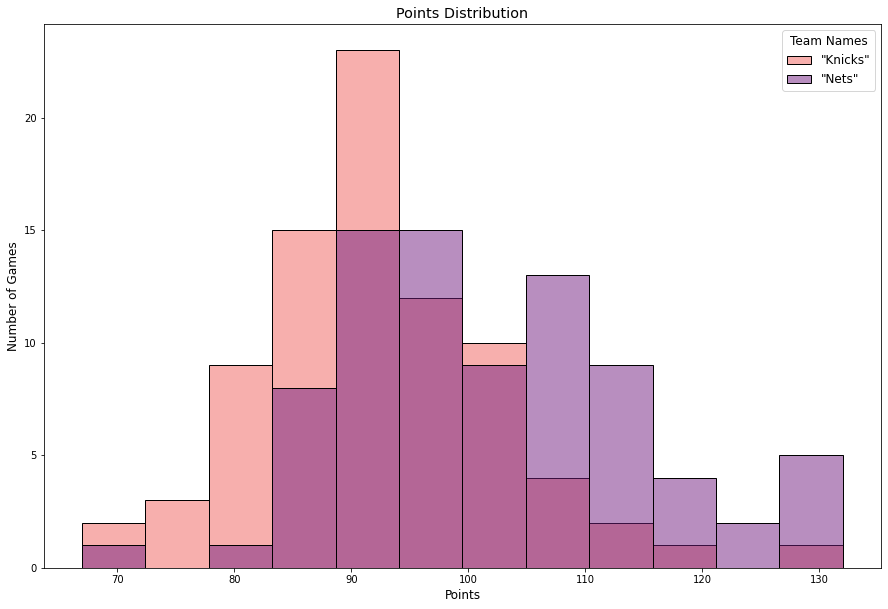

In [195]:
# Filter slice of a year 2010 so it contains only 2 teams
knicks_nets_2010 = nba_2010[(nba_2010.fran_id == 'Knicks') | (nba_2010.fran_id == 'Nets')]

# Prepare grid
plt.figure(figsize = (15,10))

# Plot a histogram
ax = sns.histplot(knicks_nets_2010, 
    x=knicks_nets_2010.pts, 
    hue=knicks_nets_2010.fran_id, 
    stat="count", 
    legend=False, 
    palette= 'magma')

# Add descriptions
ax.set_title('Points Distribution', fontsize = 'x-large')
ax.set_xlabel('Points', fontsize = 'large')
ax.set_ylabel('Number of Games', fontsize = 'large')
plt.legend(title='Team Names', 
    title_fontsize='large', 
    loc='upper right', 
    labels=['"Knicks"', '"Nets"'], 
    fontsize = 'large')

plt.show()

In [187]:
# Find most frequent score value
knicks_nets_2010.pts.mode()

0    93
Name: pts, dtype: int64

Result: in 2010, "Knicks" scored an average number of points (about 94) many times, but rarely scored more than 94 per game. "Nets" games tend to score more points per game, so one can say they have been playing better in 2010.

What about points count over years for these teams? 

In [197]:
# Filter slice of over years so it contains only 2 teams
knicks_nets_all_years = nba[(nba.fran_id == 'Knicks') | (nba.fran_id == 'Nets')]
knicks_nets_all_years = knicks_nets_all_years[knicks_nets_all_years.year_id >= 1968]

In [230]:
def visualise_lineplot(dataset, team_names):
    # Prepare grid
    plt.figure(figsize = (15,10))
    # Create lineplot
    ax = sns.lineplot( 
        x=dataset.year_id, 
        y=dataset.pts, 
        hue=dataset.fran_id,  
        palette= 'Set2',
        legend=False)

    # Add descriptions
    ax.set_title('Points Fluctuations Over Years', fontsize = 'x-large')
    ax.set_xlabel('Years', fontsize = 'large')
    ax.set_ylabel('Points', fontsize = 'large')
    
    # for i in range(len(teams_names)):
    plt.legend(title='Team Names', 
        title_fontsize='large', 
        loc='best',
        labels=[label for team_name in team_names for label in [team_name, team_name + ' points dispersion']],
        fontsize = 'large')

    return plt.show()

In [233]:
nba.fran_id.unique()

array(['Knicks', 'Celtics', 'Thunder', 'Spurs', 'Nets'], dtype=object)

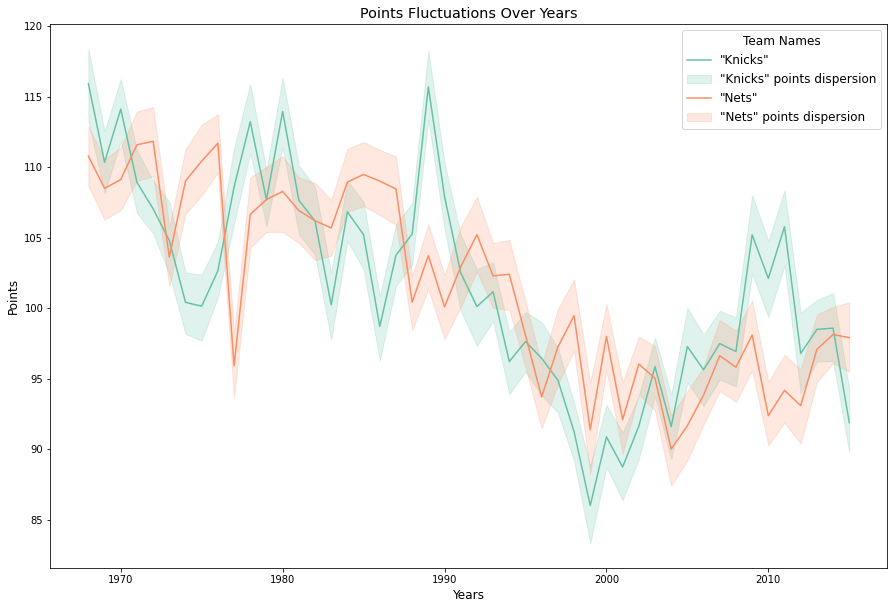

In [231]:
visualise_lineplot(knicks_nets_all_years, ['"Knicks"', '"Nets"'])

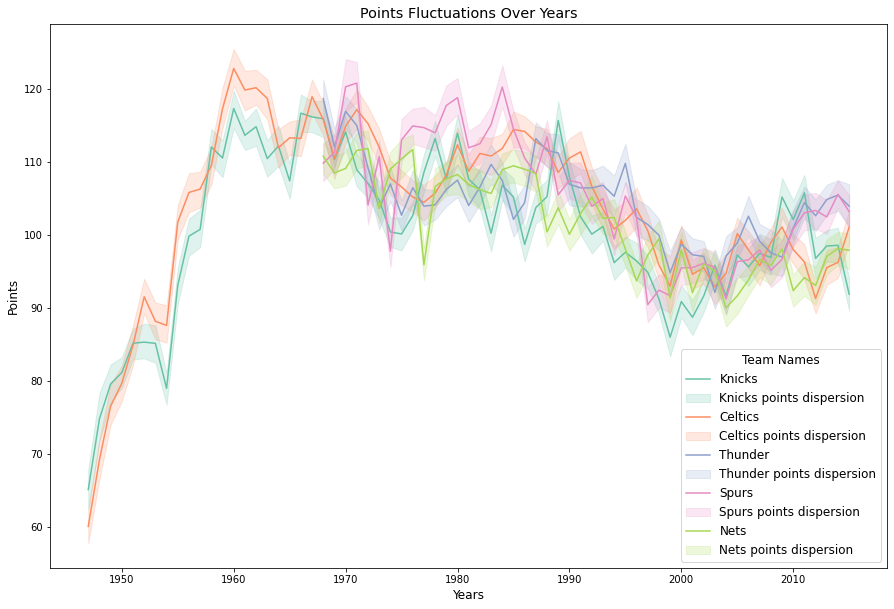

In [232]:
visualise_lineplot(nba, ['Knicks', 'Celtics', 'Thunder', 'Spurs', 'Nets'])

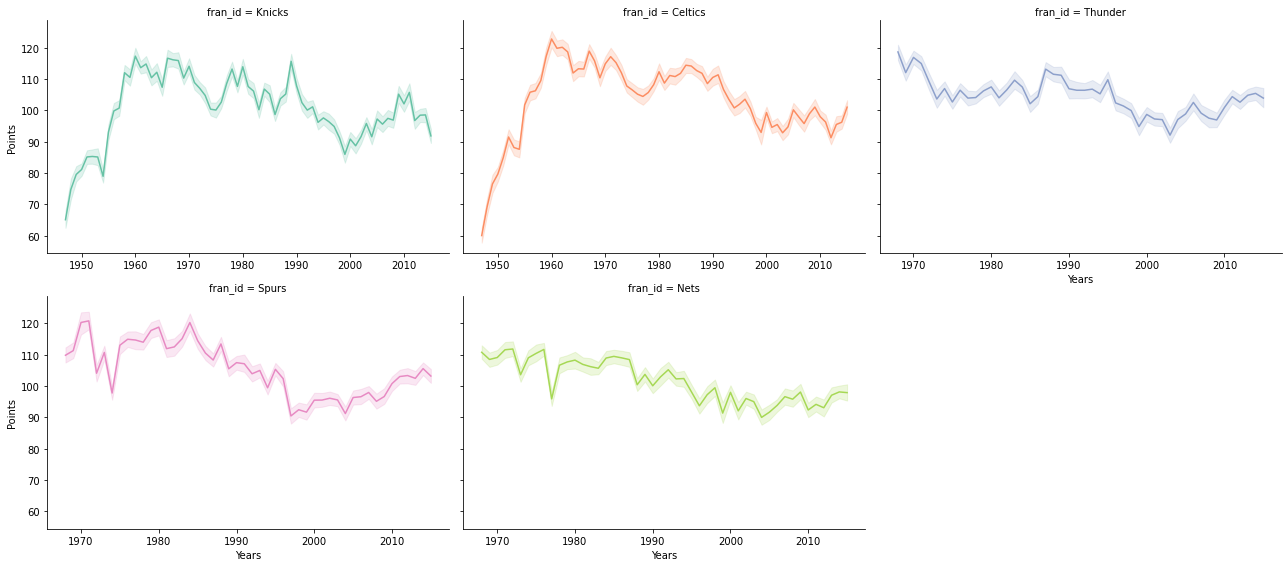

In [228]:
# Create grid
g = sns.FacetGrid(data=nba, 
    col='fran_id', 
    col_wrap=3, 
    height=4, 
    aspect=1.5, 
    hue='fran_id', 
    palette='Set2',
    sharex=False, sharey=True)
# Add plots to grid
g.map(sns.lineplot, 'year_id', 'pts')

# Add labels
g.set_axis_labels("Years", "Points")

plt.show()

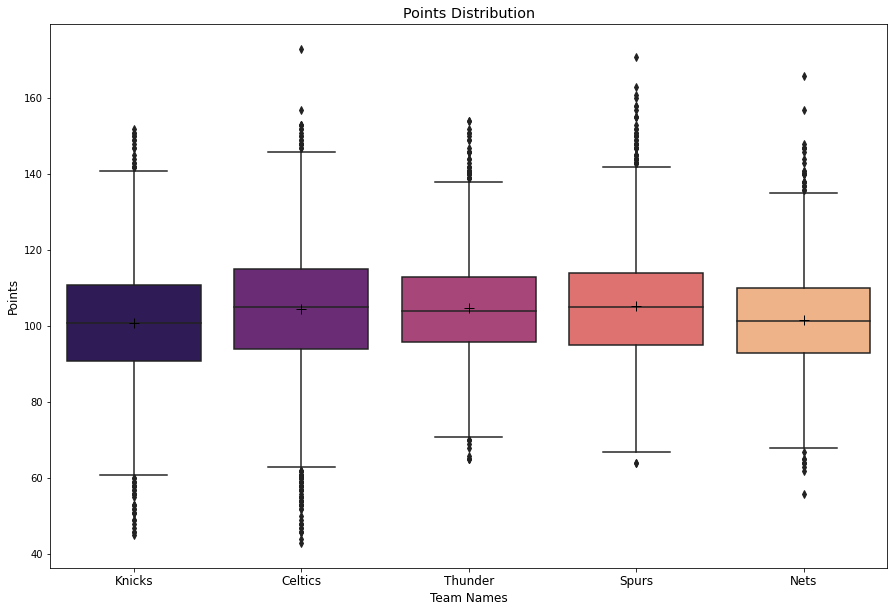

In [199]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x= nba.fran_id, 
    y= nba.pts,
    palette='magma', 
    showmeans=True,
    meanprops={"marker": "+",
        "markeredgecolor": "black",
        "markersize": "10"})

ax.set_title('Points Distribution', fontsize = 'x-large')
ax.set_xlabel('Team Names', fontsize = 'large')
ax.set_ylabel('Points', fontsize = 'large')
ax.set_xticklabels(['Knicks', 'Celtics', 'Thunder', 'Spurs', 'Nets'], fontsize = 'large')

plt.show()